In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset
  * see [this link](http://yann.lecun.com/exdb/mnist/)

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Using TensorFlow backend.


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


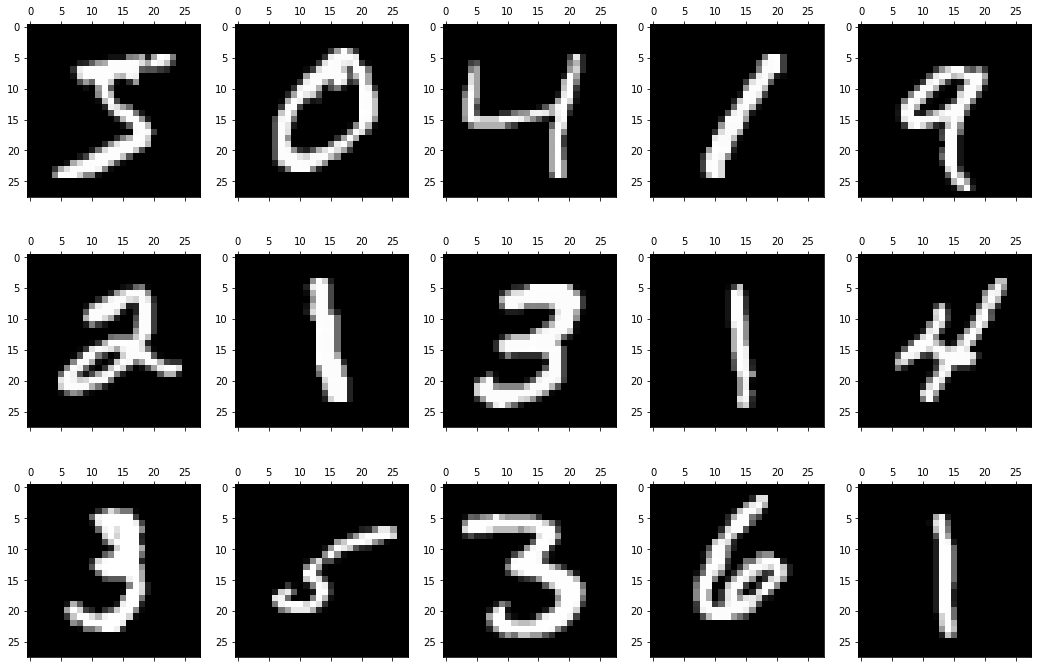

In [3]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

### Preprocessing

In [178]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [179]:
y_train_hot = np.eye(10)[y_train]

print(y_train[0:5])
y_train_hot[0:5]

[5 0 4 1 9]


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [180]:
y_test_hot = np.eye(10)[y_test]

print(y_test[0:5])
y_test_hot[0:5]

[7 2 1 0 4]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

### Define Sigmoid

0.000123394575986
0.5
0.999876605424


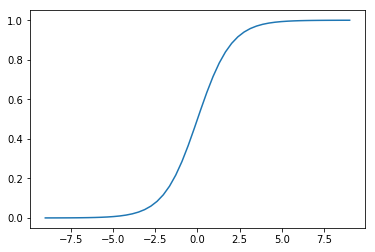

In [7]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

### Multi-layer Neural Network

- 이미지 셋 느리다. 수렴이 안된다.
    - 웨이트 초기화, 러닝 레이트
    - +bias 추가
    - Hidden layer 를 두개와 세개로 추가

#### One Hidden Layer

In [162]:
w1 = np.random.uniform(low=0.0, high=0.0001, size=(784, 3))
w2 = np.random.uniform(low=0.0, high=1.0, size=(3, 10))

In [163]:
z1 = X_train.dot(w1)
print("z1")
print(z1)
a1 = sigmoid(z1)
print("a1")
print(a1)
z2 = a1.dot(w2)
print("z2")
print(z2)
a2 = sigmoid(z2)
print("a2")
print(a2)

z1
[[ 1.50099085  1.37835903  1.29048502]
 [ 1.52379694  1.69777065  1.46973498]
 [ 0.97046207  0.89693442  0.88599784]
 ..., 
 [ 1.18385904  1.08317332  1.11638395]
 [ 0.99091687  1.10537164  1.02140511]
 [ 1.05655362  1.04407498  1.01765229]]
a1
[[ 0.81772221  0.79872732  0.78422927]
 [ 0.82109692  0.84524334  0.8130171 ]
 [ 0.72521159  0.71031912  0.70806358]
 ..., 
 [ 0.76564096  0.74709404  0.75331736]
 [ 0.72926898  0.75126524  0.73524621]
 [ 0.74203139  0.73963551  0.73451504]]
z2
[[ 1.2281877   0.44808116  2.02976356 ...,  1.12486921  1.1366887
   1.34273472]
 [ 1.26160199  0.45273962  2.09534441 ...,  1.15711623  1.16074446
   1.38611351]
 [ 1.09106483  0.39817365  1.81149835 ...,  0.99942852  1.01295648
   1.19993556]
 ..., 
 [ 1.15039274  0.42061752  1.9144862  ...,  1.05371393  1.07076808
   1.26919119]
 [ 1.12148216  0.40288318  1.87161825 ...,  1.02870262  1.03566613
   1.2399013 ]
 [ 1.12490842  0.40838384  1.87238664 ...,  1.03093243  1.04305646
   1.24058964]]
a2
[[ 0.

In [164]:
predict = a2.argmax(axis=1)
error = (predict != y_train).mean()
print(predict)
print(error)

[2 2 2 ..., 2 2 2]
0.9007


In [165]:
d2 = a2 - y_train_hot
d1 = (d2.dot(w2.T) * a1 * (1 - a1))

In [166]:
d2

array([[ 0.77350122,  0.61018292,  0.88388681, ...,  0.75489079,
         0.75707116,  0.79293931],
       [-0.22069824,  0.61129041,  0.89044986, ...,  0.76080832,
         0.76146796,  0.79997106],
       [ 0.74858218,  0.59824878,  0.85954287, ...,  0.7309462 ,
         0.73359834,  0.76851332],
       ..., 
       [ 0.75958265,  0.60363101,  0.87152231, ...,  0.74148744,
         0.74474296,  0.78060426],
       [ 0.75426354,  0.59938018,  0.86664541, ...,  0.73666429,
         0.73801292,  0.77554683],
       [ 0.75489804,  0.60070029,  0.86673419, ...,  0.73709663,
        -0.26056068,  0.77566663]])

In [167]:
d2.dot(w2.T) * a1

array([[ 3.14365048,  2.22847957,  1.56470695],
       [ 3.04220539,  2.20430456,  2.16862621],
       [ 3.06112312,  2.13937004,  1.7859901 ],
       ..., 
       [ 2.89010771,  2.04698592,  1.47306633],
       [ 2.89559444,  2.01410081,  1.92880829],
       [ 2.67201431,  2.14580199,  1.68074873]])

In [168]:
a1

array([[ 0.81772221,  0.79872732,  0.78422927],
       [ 0.82109692,  0.84524334,  0.8130171 ],
       [ 0.72521159,  0.71031912,  0.70806358],
       ..., 
       [ 0.76564096,  0.74709404,  0.75331736],
       [ 0.72926898,  0.75126524,  0.73524621],
       [ 0.74203139,  0.73963551,  0.73451504]])

In [169]:
(1 - a1)

array([[ 0.18227779,  0.20127268,  0.21577073],
       [ 0.17890308,  0.15475666,  0.1869829 ],
       [ 0.27478841,  0.28968088,  0.29193642],
       ..., 
       [ 0.23435904,  0.25290596,  0.24668264],
       [ 0.27073102,  0.24873476,  0.26475379],
       [ 0.25796861,  0.26036449,  0.26548496]])

In [170]:
d1

array([[ 0.57301766,  0.44853205,  0.33761796],
       [ 0.54425992,  0.3411308 ,  0.40549601],
       [ 0.84116116,  0.6197346 ,  0.52139556],
       ..., 
       [ 0.67732287,  0.51769495,  0.36337989],
       [ 0.78392722,  0.50097689,  0.51065931],
       [ 0.68929582,  0.55869064,  0.44621351]])

In [183]:
a1.T.dot(d2)

array([[ 30973.7931161 ,  23811.51429992,  36358.49007993,  29356.48914925,
         22313.46124427,  33392.37960928,  26843.40733627,  30373.29448475,
         30465.93874345,  32382.20785575],
       [ 30595.48066958,  23707.97667061,  36039.08084676,  29136.51704305,
         22049.0137484 ,  33073.64967954,  26602.51272317,  30114.99567003,
         30219.04458665,  32073.46946194],
       [ 30736.93477322,  23684.70002461,  36105.04503276,  29252.67849503,
         22097.25212249,  33180.1570543 ,  26686.80796758,  30097.9404567 ,
         30271.35756445,  32113.34930799]])

In [175]:
d1.shape

(60000, 3)

In [191]:
X_train.T.shape

(784, 60000)

In [188]:
X_train.T.dot(d1)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [114]:
w1 = np.random.uniform(low=0.0, high=0.000001, size=(784, 3))
# b1 = np.random.uniform(low=0.0, high=0.00001, size=3)
w2 = np.random.uniform(low=0.0, high=1.0, size=(3, 10))
# b2 = np.random.uniform(low=0.0, high=1.0, size=10)

num_epoch = 10
learning_rate = 1.0

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1)# + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)# + b2
    a2 = sigmoid(z2)
    
    predict = a2.argmax(axis=1)
    error = (predict != y_train).mean()
    
    if error < 0.1:
        break
        
#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    
    # Backpropagation
    d2 = a2 - y_train_hot
    d1 = (d2.dot(w2.T) * a1 * (1 - a1))
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)
    
print("---")
print("{0} error = {1:.5f}".format(epoch, error))

 0 error = 0.88763


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 1 error = 0.90128
 2 error = 0.90128
 3 error = 0.90128
 4 error = 0.90128
 5 error = 0.90128
 6 error = 0.90128
 7 error = 0.90128


KeyboardInterrupt: 